In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


### Importing Some Usefull libraris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline 

import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

#Subplots
from plotly.subplots import make_subplots



### Importing House prices data set

In [3]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* **SalePrice** is our target variable. We have to predict the best price of house

In [5]:
print('Train Data :>',train_data.shape)
print('-'*123)
print('Test Data :>',test_data.shape)

Train Data :> (1460, 81)
---------------------------------------------------------------------------------------------------------------------------
Test Data :> (1459, 80)


In [6]:
print('Train Data :>',train_data.info())
print('-' * 123)
print('Test Data :>',test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* The above information tells us

* Our dataset features consists of three datatypes
    1. float
    2. integer
    3. object
* Of which total numerical features are 38
* And categorical features are 43.
* But if we look closely , we see that some of the data types are incorrect.
 * For ex :- MSSubClass,OverallQual and OverallCond should be object data types.
* Also we don't have complete data for all of our features

### Training Data 
* There are total 1460 observation with 81 columns/variable/features.
* There are both numerical and categorical data.

### Test Data
* There are total 1459 observation with 80 columns/variable/features.
* The missing variable is **SalePrice** as it is the target column that we want to predict.
* There are both numerical and categorical data.


In [7]:
# Descriptive measure of data
train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [8]:
train_data.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

This doesn't help us much, let's try to visualize the number of missing values in each feature

In [9]:
# First we create a list of missing values by each feature 
temp = list(train_data.isna().sum())
# them we create a list of columns and their missing values as inner list to a separate list
lst=[]
i=0
for col in train_data.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

# finally create a dataframe
temp_train_data = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [10]:
fig = px.bar(temp_train_data.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values')
fig.update_traces(textposition='outside')
fig.show()

In [11]:
# The following columns have missing values
temp_train_data[temp_train_data['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


* Out of the 18 columns with missing values,
* Three are numerical features LotFrontage,MasVnrArea and GarageYrBlt
* And the rest are categorical features.

### Finding the missing value of train data
* Removing the missing data

In [12]:
columns_name = []
for i in train_data.columns:
    if train_data[i].isna().sum()/len(train_data)*100 >=10:
        columns_name.append(i)
print(columns_name)# List of columns which has >=10% missing data      

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
# Droping columns in train data
train_data = train_data.drop(columns=columns_name,axis = 1)
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1114,1115,20,RL,5400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2006,WD,Normal,117000
35,36,60,RL,13418,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Normal,309000
84,85,80,RL,8530,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,5,2009,WD,Normal,168500
1096,1097,70,RM,6882,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,115,0,0,0,0,3,2007,WD,Normal,127000
271,272,20,RL,39104,Pave,IR1,Low,AllPub,CulDSac,Sev,...,0,0,0,0,0,4,2008,WD,Normal,241500


### **Skewness**
* Describe how are distributed
* It is measure of shape : Symmetrical or Asymmetrical

#### Target Feature
* SalePrice

In [33]:
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Our target feature is a continuous variable with values ranging from 34900 to 755000.
* The average sale price of all the houses in our dataset is 180921.

In [34]:
fig = make_subplots(rows=1,cols=2)

fig.add_trace(go.Histogram(x=train_data['SalePrice']),row=1,col=1)
fig.add_trace(go.Box(y=train_data['SalePrice'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text='SalePrice Distribution and Box Plot')

* Sale Price has a right skewed distribution.
* The median sale price of our dataset is 163000 which is less than the average value i.e because of right skewed distribution.
* We can see some of the houses have sale price more than 4,00,000.

In [14]:
# checking the skewness
train_data.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.649415
d

* Skewness tells us about the symmetry in a distribution.
* If Skewness is equal to zero , It is a symmetrical distribution.
* And If Skewness is less than or more than zero then it is a non-symmetrical distribution.
* If value is less than zero , distribution is left skewed and value is more than zero , distribution is right skewed.
* In our above data,
    1. LotArea
    2. LowQualFinSF
    3. SsnPorchPoolArea
    4. MiscVal
* Are highly positively,right skewed.

* **BsmtUnfSF, 2ndFlrSF, OverallCond, TotRmsAbvGrd, HalfBath, Fireplaces, BsmtFullBath, OverallQual, MoSold, BedroomAbvGr, GarageArea, YrSold, FullBath, Id, GarageCars, YearRemodAdd, YearBuilt, GarageYrBlt** Variables are nearly Symmetical in shape


### Outliers 
* **MiscVal, PoolArea, LotArea, 3SsnPorch, LowQualFinSF, KitchenAbvGr, BsmtFinSF2, ScreenPorch, BsmtHalfBath, EnclosedPorch, MasVnrArea, OpenPorchSF, LotFrontage, SalePrice, BsmtFinSF1, WoodDeckSF, TotalBsmtSF, MSSubClass, 1stFlrSF, GrLivArea** Variables are positively skewed (asymmetrical in shape)


### Correlation between different features

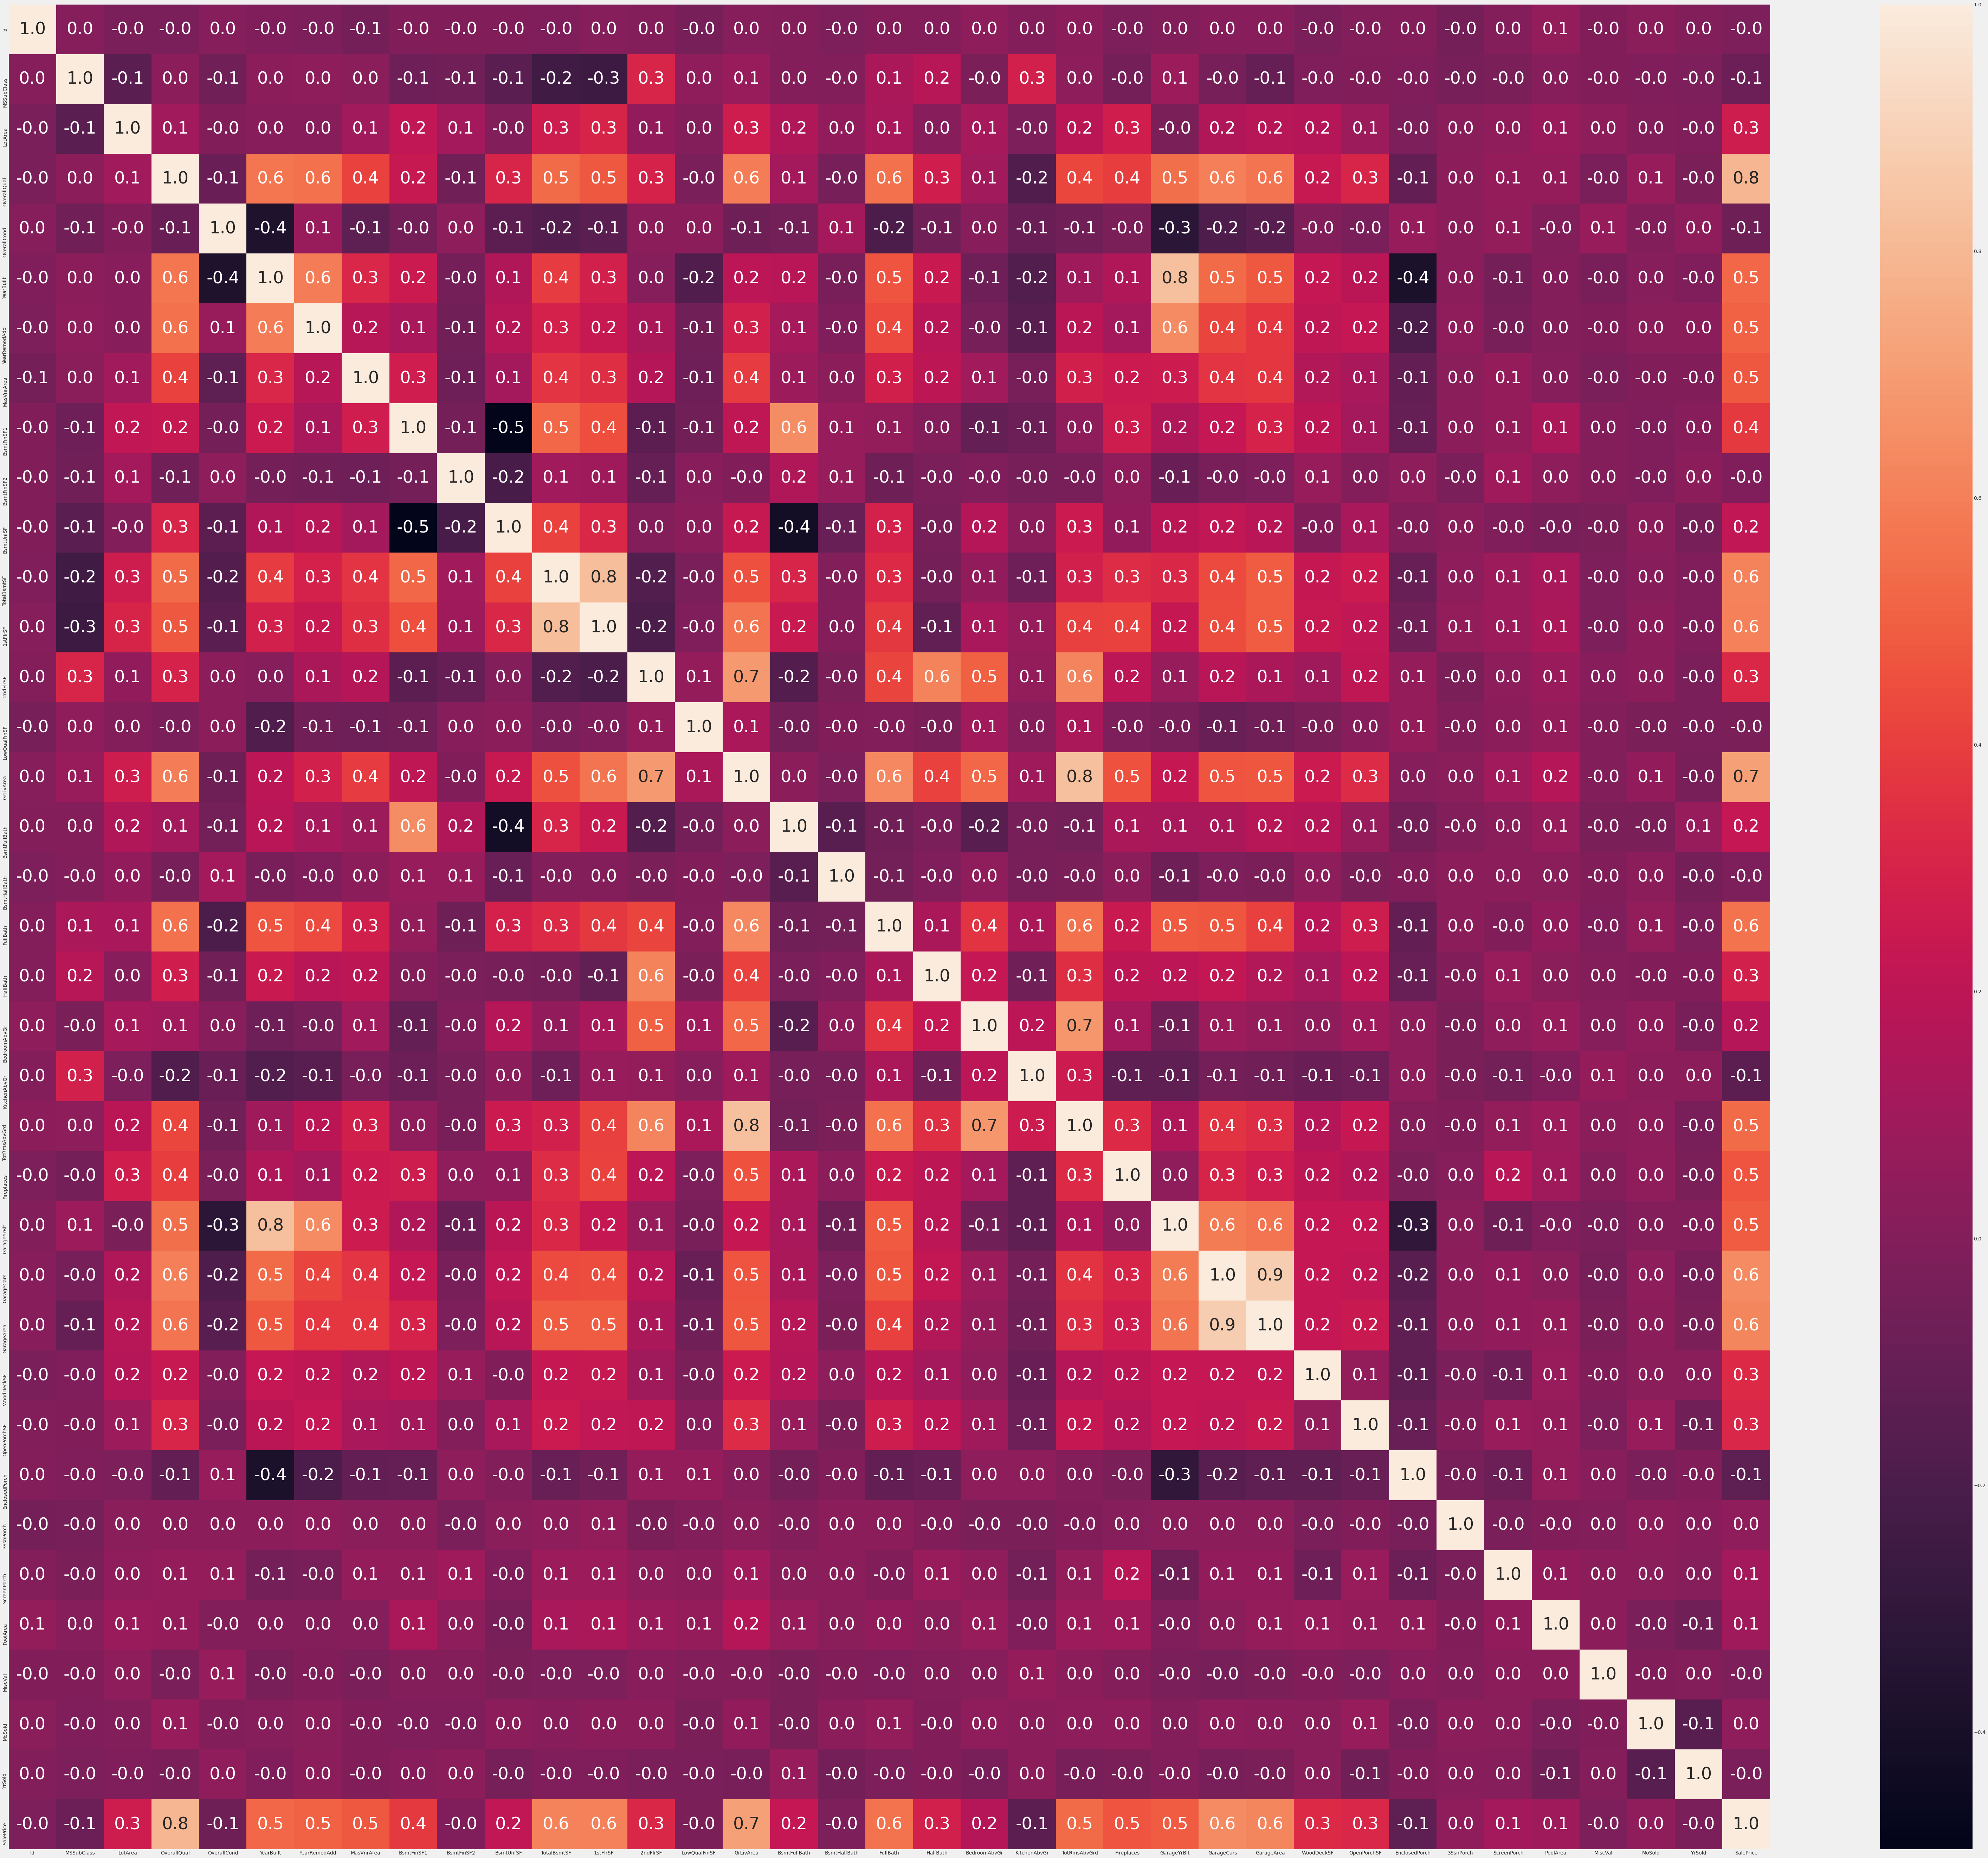

In [15]:
plt.figure(figsize=(100,90))
sns.heatmap(train_data.corr(),annot = True,fmt=".1f",annot_kws={'size':48})
# Returns correlation among fatures which obervations

In [35]:
fig = px.histogram(train_data, x="SalePrice", color='OverallQual',barmode="overlay",title="Overall Quality of the house")
fig.update_layout(height=500)
fig.show()

fig = px.histogram(train_data, x="SalePrice", color='OverallCond',barmode="overlay",title="Overall Condition of the house")
fig.update_layout(height=500)
fig.show()

### creating feature data and target data

In [49]:
feature_data = train_data.drop(columns=['SalePrice'],axis=1)
target_data =train_data.SalePrice 

In [50]:
# int and Float columns
int_float_data = feature_data.select_dtypes(include=['int','float'])

In [51]:
# categorical columns
cat_data = feature_data.select_dtypes(include=['object'])

### Creating Pipeline model

In [52]:
# creating sub-pipeline 
float_int_pipeline = make_pipeline(SimpleImputer(strategy='median'),MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OrdinalEncoder())

In [53]:
# transforming columns (preprocessing)
preprocessor = make_column_transformer(
    (float_int_pipeline,int_float_data.columns),
    (cat_pipeline,cat_data.columns)
)

In [54]:
# using LinearRegression
pipeline = make_pipeline(preprocessor, LinearRegression())

In [55]:
trainX, testX, trainY, testY = train_test_split(feature_data, target_data)

In [56]:
pipeline.fit(feature_data, target_data)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [57]:
pipeline.score(testX,testY) # using LinearRegression wwe geting 0.69

0.8802161665138477

In [58]:
# now using RandomForestClassifier
pipeline = make_pipeline(preprocessor, RandomForestClassifier()) 

In [59]:
pipeline.fit(feature_data, target_data)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [60]:
pipeline.score(testX,testY) # For this data set the RandomForestClassifier is best model to predict

1.0

In [61]:
# Now check the mean_squared_error
y_pred = pipeline.predict(testX)

In [62]:
mean_squared_error(testY, y_pred)

0.0

In [63]:
r2_score(testY, y_pred)

1.0

In [64]:
y_pred = pipeline.predict(test_data)
submission = pd.DataFrame({'Id': test_data.index,'SalePrice': y_pred})

In [65]:
submission.to_csv("house_prices_submission.csv", index=False)